# Experiments with the VTech dataset

In [1]:
# Standard library
import warnings

# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn
assert sklearn.__version__ >= "0.21", "Use the conda_python3_latest kernel!"
from sklearn import linear_model

# Local
import utils

# matplotlib hackery
%matplotlib inline

## Load dataset - with column name fixes

In [2]:
cols = []
def load_dataset(data_files):
    dfs = []
    for data_file in data_files:
        df = utils.load_dataset(f"s3://cpac/ORIG/{data_file}")
        df.rename(columns={
            "Worker Number": "worker",
            "Day Number": "day",
            "Day": "day",
            "Trial Number": "trial",
            "Time (ms)": "time",
            "state": "mode",
            
            "Orientation_T8_q0": "orientation_T8_q0",
            "Orientation_T8_q1": "orientation_T8_q1",
            "Orientation_T8_q2": "orientation_T8_q2",
            "Orientation_T8_q3": "orientation_T8_q3",
            "Orientation_RightUpperLeg_q0": "orientation_RightUpper_q0",
            "Orientation_RightUpperLeg_q1": "orientation_RightUpper_q1",
            "Orientation_RightUpperLeg_q2": "orientation_RightUpper_q2",
            "Orientation_RightUpperLeg_q3": "orientation_RightUpper_q3",
            "Orientation_LeftUpperLeg_q0": "orientation_LeftUpper_q0",
            "Orientation_LeftUpperLeg_q1": "orientation_LeftUpper_q1",
            "Orientation_LeftUpperLeg_q2": "orientation_LeftUpper_q2",
            "Orientation_LeftUpperLeg_q3": "orientation_LeftUpper_q3",
            "Position_T8_x": "position_T8_x",
            "Position_T8_y": "position_T8_y",
            "Position_T8_z": "position_T8_z",
            "Position_RightUpperLeg_x": "position_RightUpper_x",
            "Position_RightUpperLeg_y": "position_RightUpper_y",
            "Position_RightUpperLeg_z": "position_RightUpper_z",
            "Position_LeftUpperLeg_x": "position_LeftUpper_x",
            "Position_LeftUpperLeg_y": "position_LeftUpper_y",
            "Position_LeftUpperLeg_z": "position_LeftUpper_z",
            "Velocity_T8_x": "velocity_T8_x",
            "Velocity_T8_y": "velocity_T8_y",
            "Velocity_T8_z": "velocity_T8_z",
            "Velocity_RightUpperLeg_x": "velocity_RightUpper_x",
            "Velocity_RightUpperLeg_y": "velocity_RightUpper_y",
            "Velocity_RightUpperLeg_z": "velocity_RightUpper_z",
            "Velocity_LeftUpperLeg_x": "velocity_LeftUpper_x",
            "Velocity_LeftUpperLeg_y": "velocity_LeftUpper_y",
            "Velocity_LeftUpperLeg_z": "velocity_LeftUpper_z",
            "Acceleration_T8_x": "acceleration_T8_x",
            "Acceleration_T8_y": "acceleration_T8_y",
            "Acceleration_T8_z": "acceleration_T8_z",
            "Acceleration_RightUpperLeg_x": "acceleration_RightUpper_x",
            "Acceleration_RightUpperLeg_y": "acceleration_RightUpper_y",
            "Acceleration_RightUpperLeg_z": "acceleration_RightUpper_z",
            "Acceleration_LeftUpperLeg_x": "acceleration_LeftUpper_x",
            "Acceleration_LeftUpperLeg_y": "acceleration_LeftUpper_y",
            "Acceleration_LeftUpperLeg_z": "acceleration_LeftUpper_z",
            "angularVelocity_T8_x": "angularvelocity_T8_x",
            "angularVelocity_T8_y": "angularvelocity_T8_y",
            "angularVelocity_T8_z": "angularvelocity_T8_z",
            "angularVelocity_RightUpperLeg_x": "angularvelocity_RightUpper_x",
            "angularVelocity_RightUpperLeg_y": "angularvelocity_RightUpper_y",
            "angularVelocity_RightUpperLeg_z": "angularvelocity_RightUpper_z",
            "angularVelocity_LeftUpperLeg_x": "angularvelocity_LeftUpper_x",
            "angularVelocity_LeftUpperLeg_y": "angularvelocity_LeftUpper_y",
            "angularVelocity_LeftUpperLeg_z": "angularvelocity_LeftUpper_z",
            "angularAcceleration_T8_x": "angularacceleration_T8_x",
            "angularAcceleration_T8_y": "angularacceleration_T8_y",
            "angularAcceleration_T8_z": "angularacceleration_T8_z",
            "angularAcceleration_RightUpperLeg_x": "angularacceleration_RightUpper_x",
            "angularAcceleration_RightUpperLeg_y": "angularacceleration_RightUpper_y",
            "angularAcceleration_RightUpperLeg_z": "angularacceleration_RightUpper_z",
            "angularAcceleration_LeftUpperLeg_x": "angularacceleration_LeftUpper_x",
            "angularAcceleration_LeftUpperLeg_y": "angularacceleration_LeftUpper_y",
            "angularAcceleration_LeftUpperLeg_z": "angularacceleration_LeftUpper_z",
            "jT9T8": "jointangles_T8_x",
            "jT9T8.1": "jointangles_T8_y",
            "jT9T8.2": "jointangles_T8_z",
            "jRightHip": "jointangles_RightUpper_x",
            "jRightHip.1": "jointangles_RightUpper_y",
            "jRightHip.2": "jointangles_RightUpper_z",
            "jLeftHip": "jointangles_LeftUpper_x",
            "jLeftHip.1": "jointangles_LeftUpper_y",
            "jLeftHip.2": "jointangles_LeftUpper_z",
        }, inplace=True)
                          
        df.drop(columns=["mode_graph"], inplace=True)
        dfs.append(df)
        cols.append(df.columns)
    return pd.concat(dfs, ignore_index=True)
                                
df = load_dataset([
    "VTech/W1_Day1a.csv",
    "VTech/W1_Day1b.csv",
    "VTech/VTdata_W2a.csv",
    "VTech/VTdata_W2b.csv",
    "VTech/W3_D1_2.csv",
    "VTech/W3_D1_3.csv",
    "VTech/VTdata_W4_D1a.csv",
    "VTech/VTdata_W4_D1b.csv"
])

## Convert mode labels to numbers

Engage = `1`, Disengage (or enything else) = `0`

In [3]:
df["mode"] = df["mode"].str.contains("Engage").astype("int")

## Dataset information

In [38]:
print(f"Number of workers: {len(df['worker'].unique())}")
for worker, worker_df in df.groupby("worker"):
    print(f"\tWorker {worker}: {len(worker_df['day'].unique())} days"
          f", {len(worker_df['trial'].unique())} trials"
          f", {worker_df['mode'].diff().abs().sum():3.0f} transitions"
          f", {len(worker_df):10,} samples")
print(f"Total number of transitions: {df['mode'].diff().abs().sum()}")


Number of workers: 4
	Worker 1: 1 days, 5 trials,  28 transitions,  1,448,215 samples
	Worker 2: 3 days, 4 trials,  68 transitions,  1,351,866 samples
	Worker 3: 1 days, 2 trials,  59 transitions,    859,697 samples
	Worker 4: 1 days, 6 trials, 110 transitions,  1,646,663 samples
Total number of transitions: 266.0


## Simple experiment with SGD

Using a manual train/test allocation.

In [5]:
test_selector = df["worker"] == 4
train, test = df[~test_selector], df[test_selector]

In [6]:
features = pd.IndexSlice["orientation_T8_q0": "jointangles_LeftUpper_z"]
target = "mode"

clf = linear_model.SGDClassifier(max_iter=50)
clf.fit(train.loc[:, features], train.loc[:, target])

/home/ec2-user/anaconda3/envs/cpac/lib/python3.6/site-packages/sklearn/linear_model/_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(max_iter=50)

In [7]:
clf.score(test.loc[:, features], test.loc[:, target])

0.6505654162387811

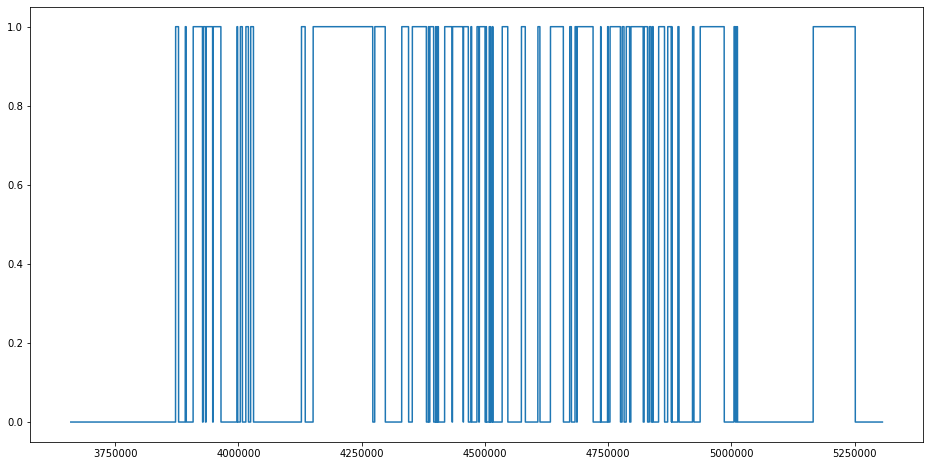

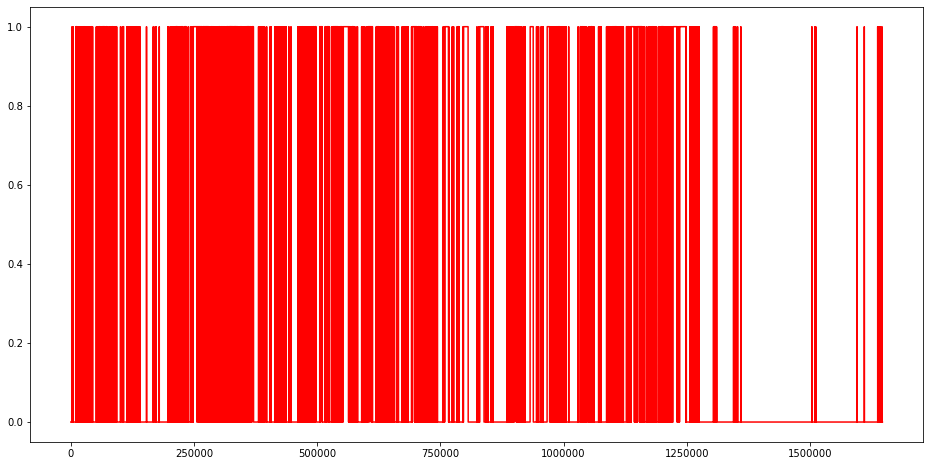

In [40]:
y_hat = clf.predict(test.loc[:, features])
y = test.loc[:, target]
plt.figure(figsize=(16,8))
plt.plot(y)
plt.figure(figsize=(16,8))
plt.plot(y_hat, 'r')